# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# cleaning
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [3]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

### Merge the DataFrames

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [9]:
# check data
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [10]:
pyber_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [11]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [12]:
city_data_df["driver_count"].count()

120

In [13]:
city_data_df["driver_count"].sum()

2973

In [14]:
#  1. Get the total rides for each city type.  Use the groupby()to create series of data that has city type as
#index then apply the count() method to the "ride_id" column.

pyber_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
pyber_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
# 2. Get the total drivers for each city type. Use the groupby() function to create a series of data that has
#the type of city as the index, then apply the sum() method to the "driver_count" column.

pyber_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
pyber_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [16]:
#  3. Get the total amount of fares for each city type. Use the groupby()function to create a series of data that has 
# the type of city as the index, then apply the sum() function to the 'fare' column
type_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_total.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
#  4. Get the average fare per ride for each city type. by dividing the sum of all of the fares by the total 
# rides
average_fare_per_ride = (pyber_data_df.groupby(["type"]).mean()["fare"]) 
average_fare_per_ride.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [18]:
# 5. Get the average fare per driver for each city type. calculate the average fare per driver by city type by
# dividing the sum of all the fares by the total drivers.
average_fare_per_driver = (pyber_data_df.groupby(["type"]).sum()["fare"]) / (pyber_driver_count)
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [20]:
#  6. Create a PyBer summary DataFrame. with all of the data gathered from steps 1-5 using the column names
# Type, Total Rides, Total Drivers, Total Fares, Average Fare per Ride, Average Fare per Driver.
PyBer_summary_df = pd.DataFrame()
          
PyBer_summary_df["Total Rides"] = pyber_ride_count 
PyBer_summary_df["Total Drivers"] = pyber_driver_count
PyBer_summary_df["Total Fares"] = type_fare_total
PyBer_summary_df["Average Fare Per Ride"] = average_fare_per_ride
PyBer_summary_df["Average Fare Per Driver"] = average_fare_per_driver

PyBer_summary_df.head()



,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [21]:
#  7. Cleaning up the DataFrame. Delete the index name. run this code.
PyBer_summary_df.index.name = None

In [22]:
PyBer_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare Per Ride      float64
Average Fare Per Driver    float64
dtype: object

In [23]:
#  8. Format the columns. format the columns like this: type, total rides, total drivers, total fares, average fare per ride,
# average fare per driver.

# Format the "Total Rides" to have the comma for a thousands separator.
PyBer_summary_df["Total Rides"] = PyBer_summary_df["Total Rides"].map("{:,}".format)
# Format the "Total Drivers" to have the comma for a thousands separator.
PyBer_summary_df["Total Drivers"] = PyBer_summary_df["Total Drivers"].map("{:,}".format)
# Format the "Total Fares" to have the comma for a thousands separator, a decimal separator and a "$".
PyBer_summary_df["Total Fares"] = PyBer_summary_df["Total Fares"].map("${:,.2f}".format)
# Format the "Average Fare per Ride" to have the comma for a thousands separator, a decimal separator and a "$".
PyBer_summary_df["Average Fare Per Ride"] = PyBer_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
# Format the "Average Fare per Driver" to have the comma for a thousands separator, a decimal separator and a "$".
PyBer_summary_df["Average Fare Per Driver"] = PyBer_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

# Display the data frame
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [24]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
PyBer_pivot = pyber_data_df.groupby(["date" , "type"]).sum()["fare"]
PyBer_pivot

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [26]:
pyber_data_df.dtypes


city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [27]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
PyBer_pivot = PyBer_pivot.reset_index()
PyBer_pivot

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [28]:
# date testing
import datetime as dt
pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"]).dt.date
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07,44.94,4256853490277,4,Rural


In [29]:
PyBer_pivot.index.name = None

In [30]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
PyBer_pivot_run = PyBer_pivot.pivot(index = "date", columns = "type", values = "fare")
PyBer_pivot_run.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [31]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Fares_2019_JanApr_df = PyBer_pivot_run.loc["2019-01-01":"2019-04-28"]
Fares_2019_JanApr_df




type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [32]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Fares_2019_JanApr_df.index = pd.to_datetime(Fares_2019_JanApr_df.index)


In [33]:
# 7. Check that the datatype for the index is datetime using df.info()
Fares_2019_JanApr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [34]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
PerWeek_fares_df = Fares_2019_JanApr_df.resample("W").sum()
PerWeek_fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


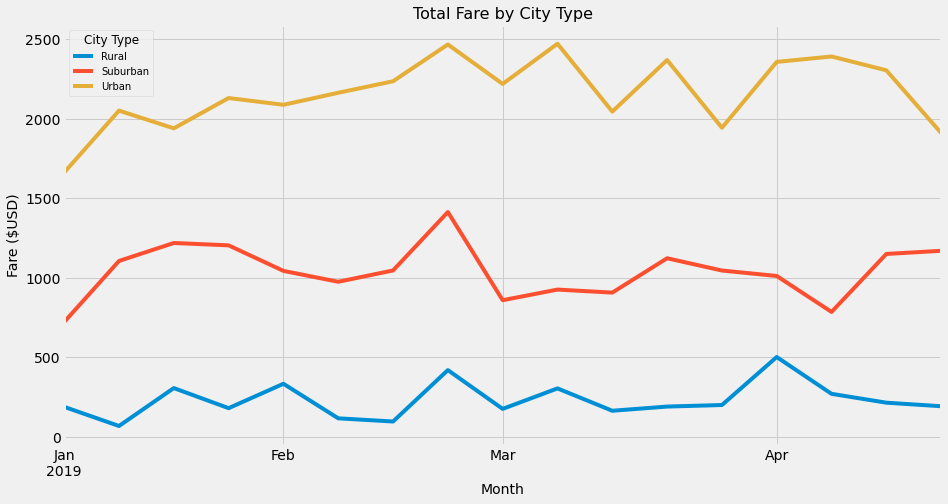

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')
PerWeek_fares_df.plot(figsize=(14, 8))
plt.gcf().subplots_adjust(bottom=0.15)

# graph properties
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)

# Legend
lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save
plt.savefig("analysis/PyBer_fare_summary.png")

# Show
plt.show()
